In [ ]:
!pip install bootstrapped

  Created wheel for bootstrapped: filename=bootstrapped-0.0.2-py2.py3-none-any.whl size=13953 sha256=9994fb0d4eb2025882252697991fc2cd936def88097b80f33fa7858a91be77ce
  Stored in directory: /root/.cache/pip/wheels/38/23/ee/3493dbb0019f511085117a962bfadb1f7d221e7b78761943a7
Successfully built bootstrapped


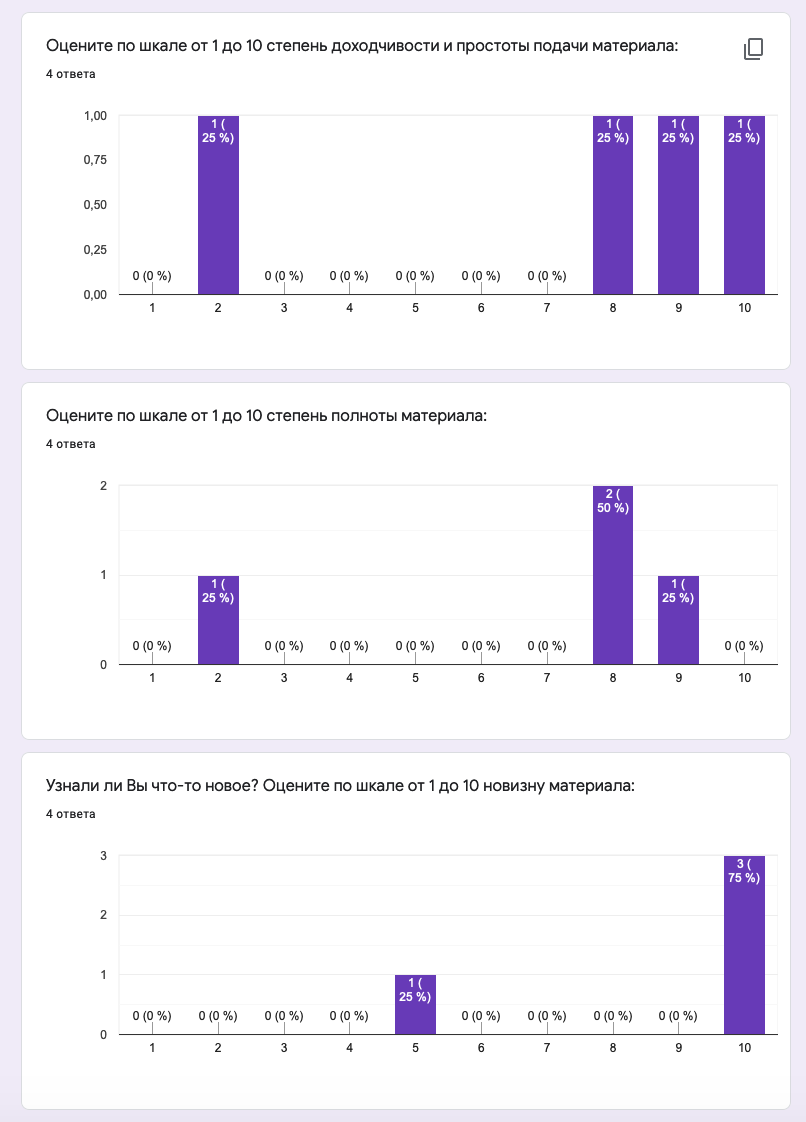

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from random import randint
from bootstrapped import bootstrap as bs
from bootstrapped import compare_functions as bs_compare
from bootstrapped import stats_functions as bs_stats
from datetime import datetime as dt, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
series_a, series_b = list(), list()
def gen_dist(c = 10):
  series = sorted(np.random.randint(1, 100, 7)* c )
  series[2], series[3] = series[3], series[2]
  series[4], series[3] = series[3], series[4]
  return series
series_a = [item for sub_series in [gen_dist() for i in range(3)] for item in sub_series]
series_b = [item for sub_series in [gen_dist(15) for i in range(3)] for item in sub_series]

value = [item for sub_series in [sorted(np.random.randint(25, 500, 7)) for i in range(3)] for item in sub_series]

In [ ]:
date_series = [dt.today().date()+timedelta(dt_delta) for dt_delta in range(21)]
data = pd.DataFrame({'dt': date_series, 'group_a': pd.Series(series_a), 'group_b': pd.Series(series_b), 'total_metric_value': pd.Series(value)})

In [ ]:
data = pd.read_csv('test_data.csv')

In [ ]:
data.head()

dt  group_a  group_b  total_metric_value
0  2020-12-09       20      405                  25
1  2020-12-10       80      420                  53
2  2020-12-11      400      765                 207
3  2020-12-12      560     1035                 345
4  2020-12-13      390      630                 443

<H2> График временного ряда

Позволяет увидеть и вызуально оценить корреляции, взаимозависимости, тренды и предположить наиболее подходящие модели для прогноза, которые можно впоследствии уточнить более точными методами. 

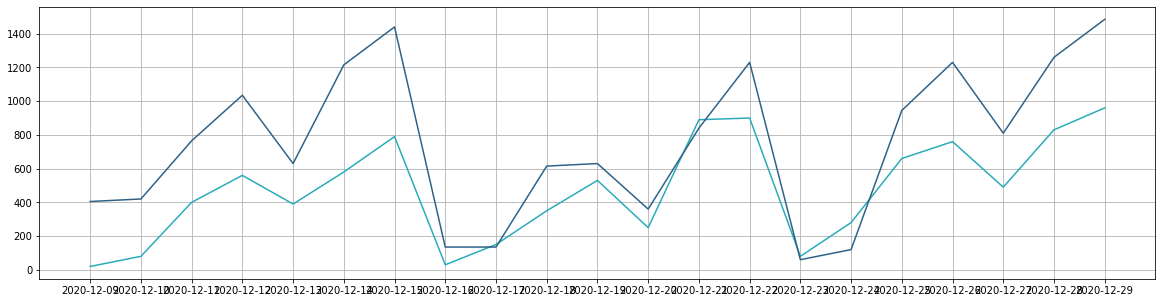

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(data['dt'], data['group_a'], '#28abb9', data['dt'], data['group_b'], '#2d6187')
plt.grid(True)
plt.show()


<H2> Диаграмма рассеяния

**Диаграмма рассеяния** - математическая диаграмма взаимозависимости двух переменных, изображающая значения двух переменных в виде точек на декартовой плоскости.

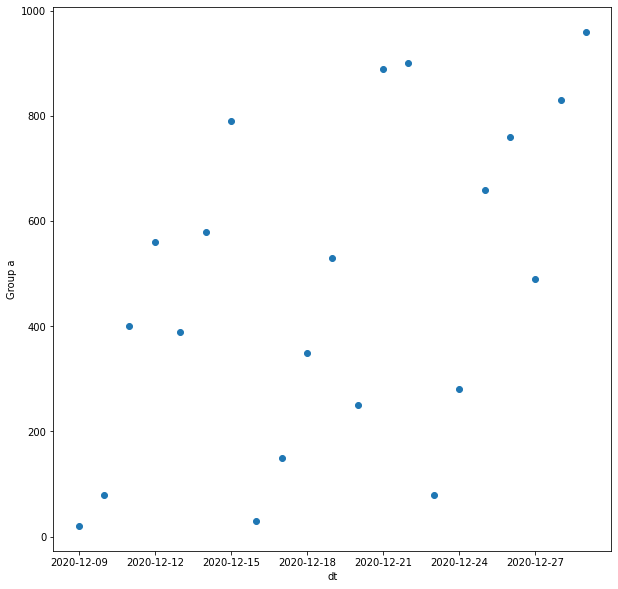

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter('dt', 'group_a', data=data)
plt.xlabel('dt')
plt.xticks(np.arange(0, data['dt'].shape[0], 3))
plt.ylabel('Group a')
plt.show()

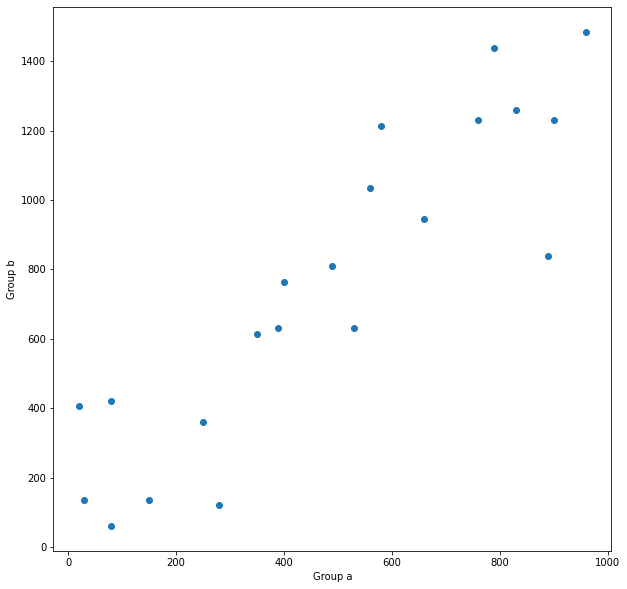

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter('group_a', 'group_b', data=data)
plt.xlabel('Group a')
plt.ylabel('Group b')
plt.show()

In [158]:
data.head()

dt  group_a  group_b  total_metric_value
0  2020-12-09       20      405                  25
1  2020-12-10       80      420                  53
2  2020-12-11      400      765                 207
3  2020-12-12      560     1035                 345
4  2020-12-13      390      630                 443

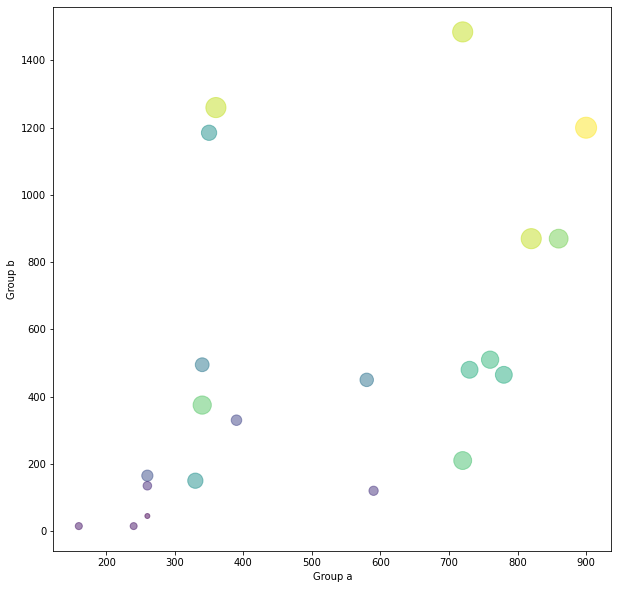

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter('group_a', 'group_b', c='total_metric_value', s='total_metric_value', alpha = 0.5, data=data)
plt.xlabel('Group a')
plt.ylabel('Group b')
plt.show()

<H2> Пузырьковая диаграмма

**Пузырьковая диаграмма** отображает 3 измерения данных.

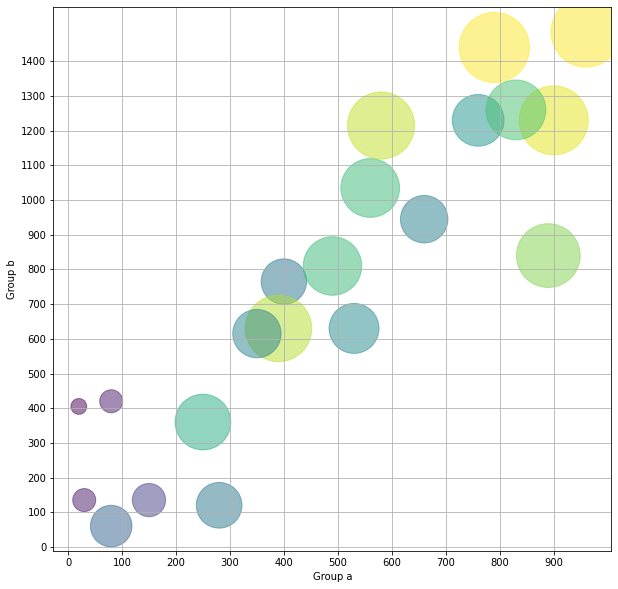

In [ ]:
data_copy = data.copy(deep=True)
data_copy['total_metric_value'] = data_copy['total_metric_value']*10
plt.figure(figsize=(10,10))
plt.scatter('group_a', 'group_b', c='total_metric_value', s='total_metric_value', alpha = 0.5, data=data_copy)
plt.xticks(np.arange(0, data_copy['group_a'].max(), 100))
plt.yticks(np.arange(0, data_copy['group_b'].max(), 100))
plt.xlabel('Group a')
plt.ylabel('Group b')
plt.grid(True)
plt.show()
del data_copy

In [ ]:
data[(data['group_a'] >= 700) & (data['group_b'] >= 1300) | (data['group_a'].between(350,400)) & (data['group_b'].between(600,700))]

dt  group_a  group_b  total_metric_value
4   2020-12-13      390      630                 443
6   2020-12-15      790     1440                 495
9   2020-12-18      350      615                 234
20  2020-12-29      960     1485                 496

<H2> Гистограмма

**Гистограмма** - график график статистического распределения набора данных по категориям, по оси oX - категории, по оси oY - кол-ва или частоты (вероятности) выпадения данной категории. 

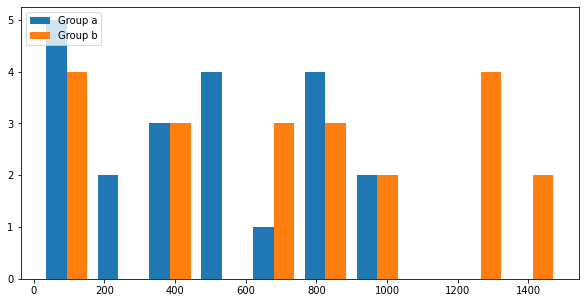

In [ ]:
plt.figure(figsize=(10,5))
plt.hist([data['group_a'], data['group_b']], label=['Group a', 'Group b'])
plt.legend(loc='upper left')
plt.show()

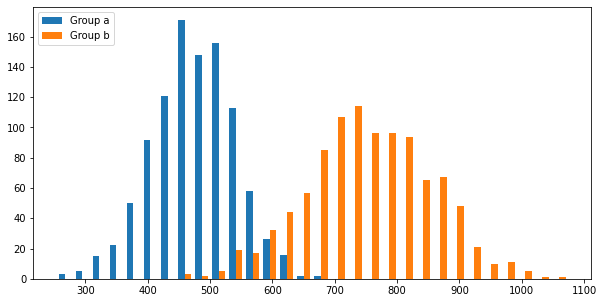

In [ ]:
bs_a = bs.bootstrap(data['group_a'].values, stat_func=bs_stats.mean, 
             num_iterations=1000, iteration_batch_size=20, 
             return_distribution=True)

bs_b = bs.bootstrap(data['group_b'].values, stat_func=bs_stats.mean, 
             num_iterations=1000, iteration_batch_size=20, 
             return_distribution=True)

plt.figure(figsize=(10,5))
plt.hist([bs_a, bs_b], bins = 30, label=['Group a', 'Group b'])
plt.legend(loc='upper left')
plt.show()

In [180]:
from scipy.stats import ttest_ind

alpha = 0.05
st = ttest_ind(bs_a, bs_b)

print('Diffs is {}significant'.format({True: '', False: 'not'}[st[1] < alpha]))

Diffs is significant


In [183]:
df = pd.read_csv('hw_abt_2_byuser.csv', sep='\t')

In [191]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([5, 12])
nobs = np.array([83, 99])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

0.159


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [192]:
np.array([5, 12])

array([ 5, 12])

In [187]:
df = pd.read_csv('hw_abt_2_bybucket.csv', sep='\t')

In [188]:
df.head()

group_id  metric_value  users  visits  churn_users  churn_visits
0         1     1875345.0    155    1419          151          2207
1         2     1662237.0    138    1320          127          1853
2         3     1784372.0    128    1281          159          2032
3         4     1876826.0    163    1644          168          2172
4         5     1913180.0    156    1675          174          2273

In [190]:
df.group_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

<H2> Диаграммы размаха

**Диаграммы размаха** - график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей. 

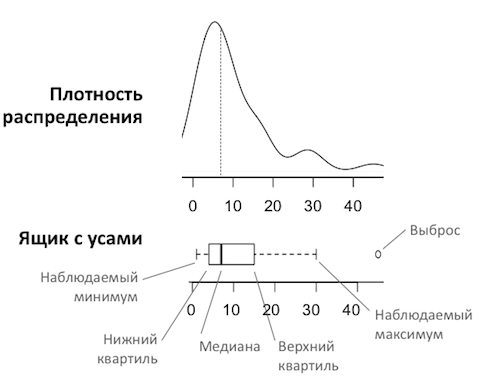

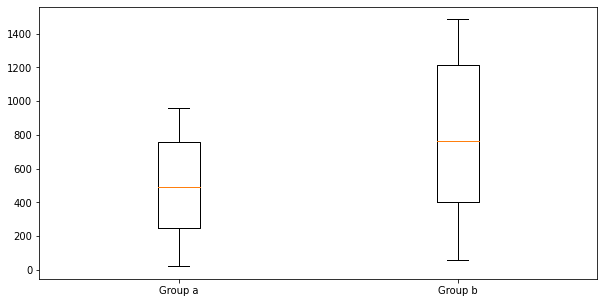

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot([data['group_a'], data['group_b']])
labels=['Group a', 'Group b']
plt.xticks(np.arange(len(labels))+1,labels)
plt.show()

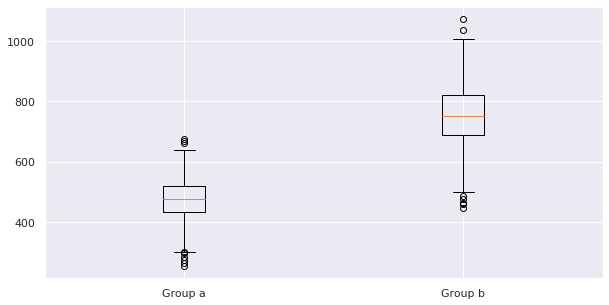

In [159]:
plt.figure(figsize=(10,5))
plt.boxplot([bs_a, bs_b])
labels=['Group a', 'Group b']
plt.xticks(np.arange(len(labels))+1,labels)
plt.show()


<H2> Скрипичная диаграмма

**Скрипичная диаграмма** - это сочетание диаграммы размаха и графика плотности, развернутых и расположенных по обе стороны для отображения формы распределения данных. 

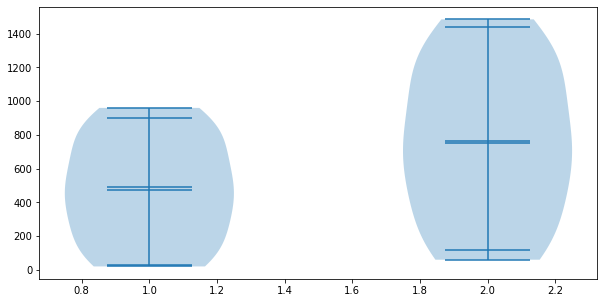

In [ ]:
plt.figure(figsize=(10,5))
plt.violinplot([data['group_a'], data['group_b']], showmeans=True, showmedians=True,
                                                   showextrema=True, quantiles = [[0.05, 0.95], [0.05, 0.95]])
plt.show()

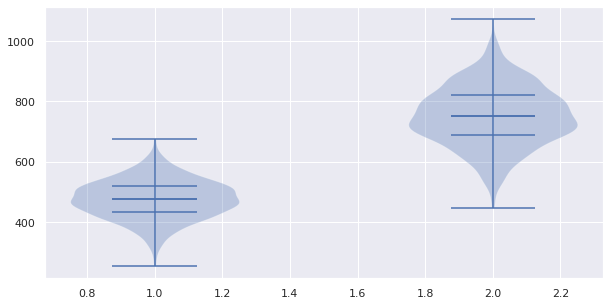

In [163]:
plt.figure(figsize=(10,5))
plt.violinplot([bs_a, bs_b], showmeans=True, showmedians=True,
                             showextrema=True, quantiles = [[0.25, 0.75], [0.25, 0.75]])
plt.show()

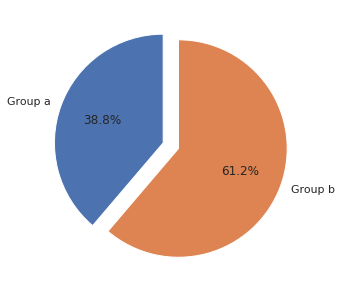

In [167]:

plt.figure(figsize=(10,5))
plt.pie([data['group_a'].sum(), data['group_b'].sum()], explode=[0.0, 0.15], labels=['Group a', 'Group b'], autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.show()

<H2> Тепловая карта

**Тепловая карта** — инструмент визуализации зависимости целевой переменной от пары независимых параметров, отображаемый при помощи цвета.

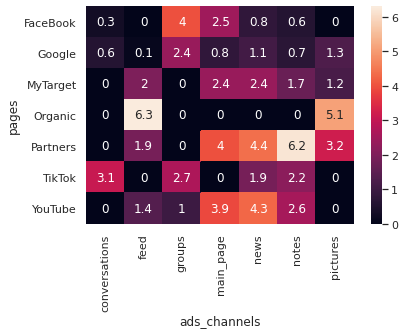

In [ ]:
sns.set_theme(color_codes=True)
new_users_share = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])
pages = ["main_page", "groups", "news", "conversations",
              "notes", "pictures", "feed"] # start pages
ads_channels = ["Google", "MyTarget", "FaceBook",
           "YouTube", "TikTok", "Partners", "Organic"] # advertising_campaign_channels

l = list()
for i in range(len(pages)):
  for j in range(len(ads_channels)):
    l.append([ads_channels[j], pages[i], new_users_share[i][j]])
df = pd.DataFrame(l, columns = ['pages', 'ads_channels', 'new_users'])

sns.heatmap(df.pivot(values = 'new_users', index='pages', columns='ads_channels'), annot=True, fmt=".3g")

In [175]:
df.head(10)

ads_channels      pages  new_users
0       Google  main_page        0.8
1     MyTarget  main_page        2.4
2     FaceBook  main_page        2.5
3      YouTube  main_page        3.9
4       TikTok  main_page        0.0
5     Partners  main_page        4.0
6      Organic  main_page        0.0
7       Google     groups        2.4
8     MyTarget     groups        0.0
9     FaceBook     groups        4.0

In [173]:
df = df.rename(columns={'pages': 'ads_channels', 'ads_channels':'pages'})

In [174]:
df.pivot(values = 'new_users', index='pages', columns='ads_channels')

ads_channels   FaceBook  Google  MyTarget  Organic  Partners  TikTok  YouTube
pages                                                                        
conversations       0.3     0.6       0.0      0.0       0.0     3.1      0.0
feed                0.0     0.1       2.0      6.3       1.9     0.0      1.4
groups              4.0     2.4       0.0      0.0       0.0     2.7      1.0
main_page           2.5     0.8       2.4      0.0       4.0     0.0      3.9
news                0.8     1.1       2.4      0.0       4.4     1.9      4.3
notes               0.6     0.7       1.7      0.0       6.2     2.2      2.6
pictures            0.0     1.3       1.2      5.1       3.2     0.0      0.0

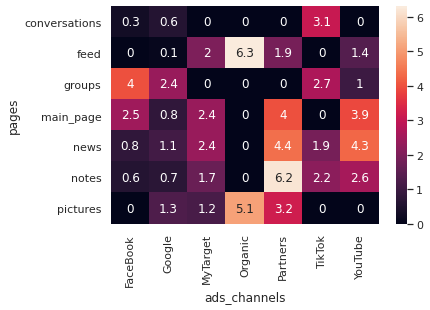

In [176]:
sns.heatmap(df.pivot(values = 'new_users', index='pages', columns='ads_channels'), annot=True, fmt=".3g")

<H2> Дендрограмма

**Дендрограмма** — древовидная диаграмма, содержащая n количество уровней, представляющих собой каждый шаг процесса последовательного укрупнения кластеров

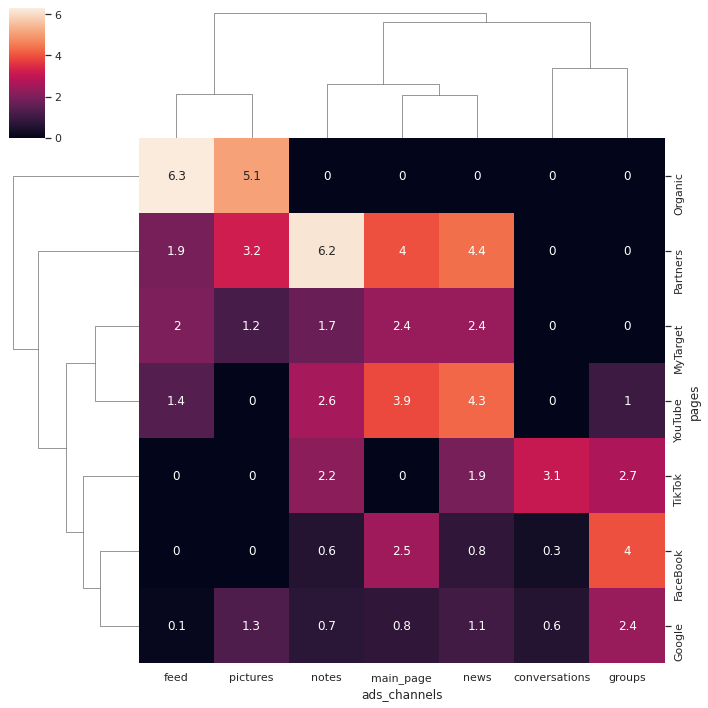

In [ ]:
sns.clustermap(df.pivot(values = 'new_users', index='pages', columns='ads_channels'), annot=True, fmt=".3g")

<H2> Диаграмма Сэнки

**Диаграмма Сэнки** — инструмент визуализации потоков

In [177]:
data.head()

dt  group_a  group_b  total_metric_value
0  2020-12-09       20      405                  25
1  2020-12-10       80      420                  53
2  2020-12-11      400      765                 207
3  2020-12-12      560     1035                 345
4  2020-12-13      390      630                 443

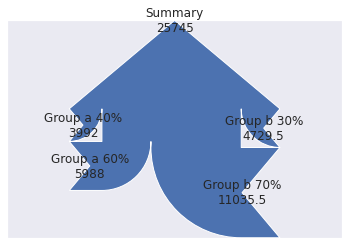

In [178]:
from matplotlib.sankey import Sankey

summary = data['group_a']+data['group_b']
sankey = Sankey()
sankey.add(flows=[data['group_a'].sum()*0.4,
                  data['group_a'].sum()*0.6, 
                  
                  data['group_b'].sum()*0.7, 
                  data['group_b'].sum()*0.3, 
                  -summary.sum()], # 0.5 + 0.5 = 1
           orientations=[1, 1, -1, -1, 0], rotation=90,
           labels=['Group a 40%', 'Group a 60%', 'Group b 70%', 'Group b 30%', 'Summary'])
sankey.finish()
plt.show()

<H2> Системы визуализации

**1. Tableau**

**2. PowerBI**

**3. Apache SuperSet**

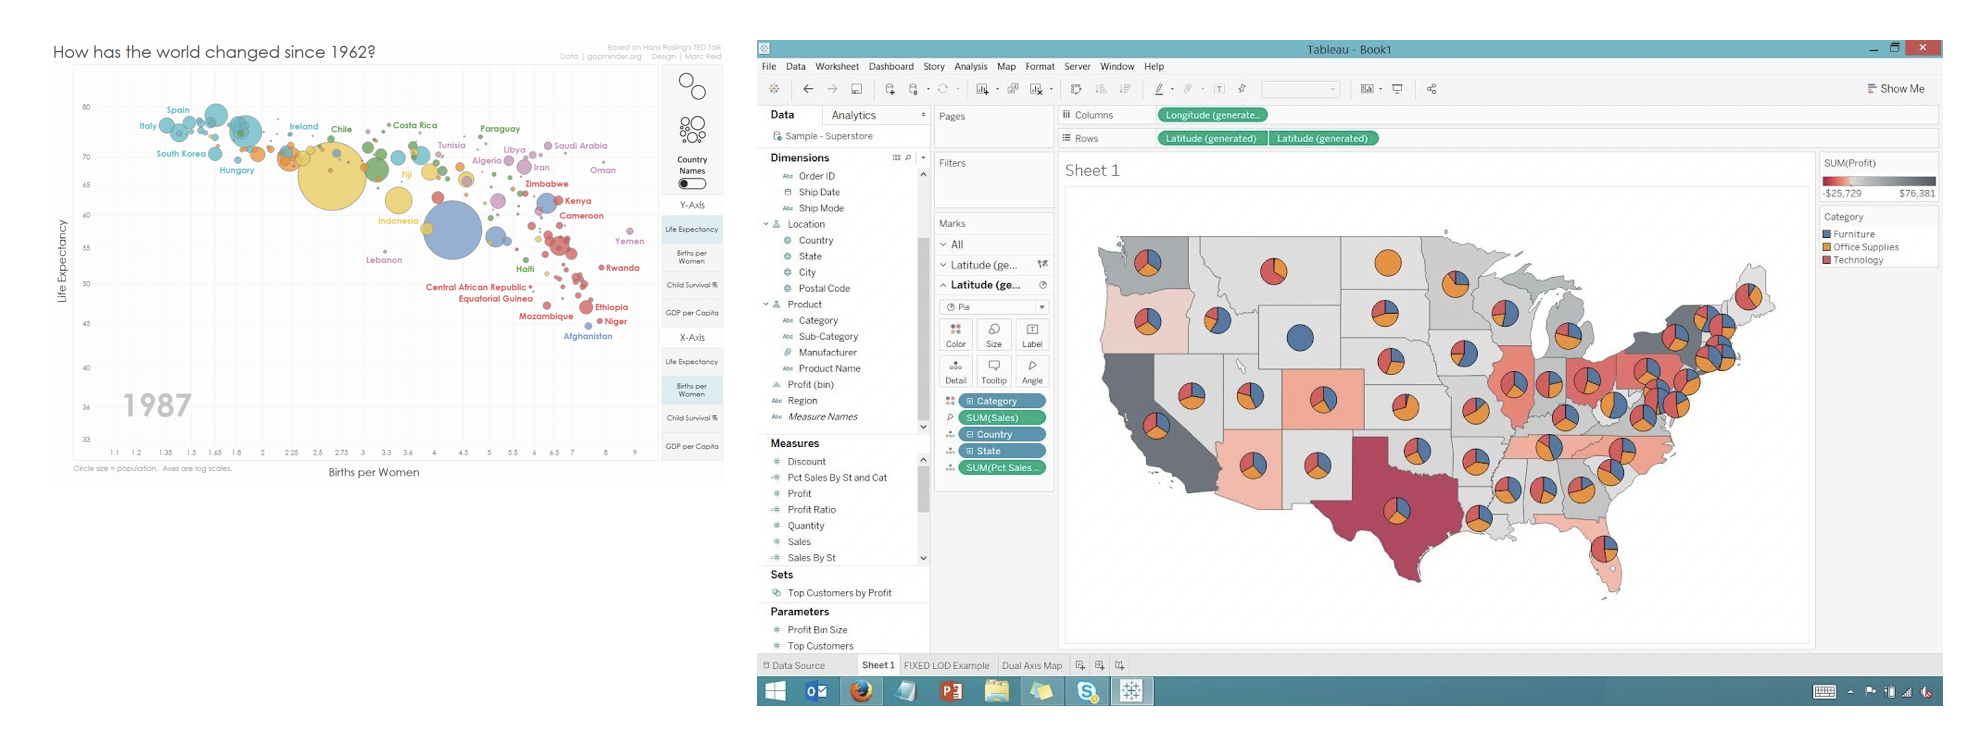



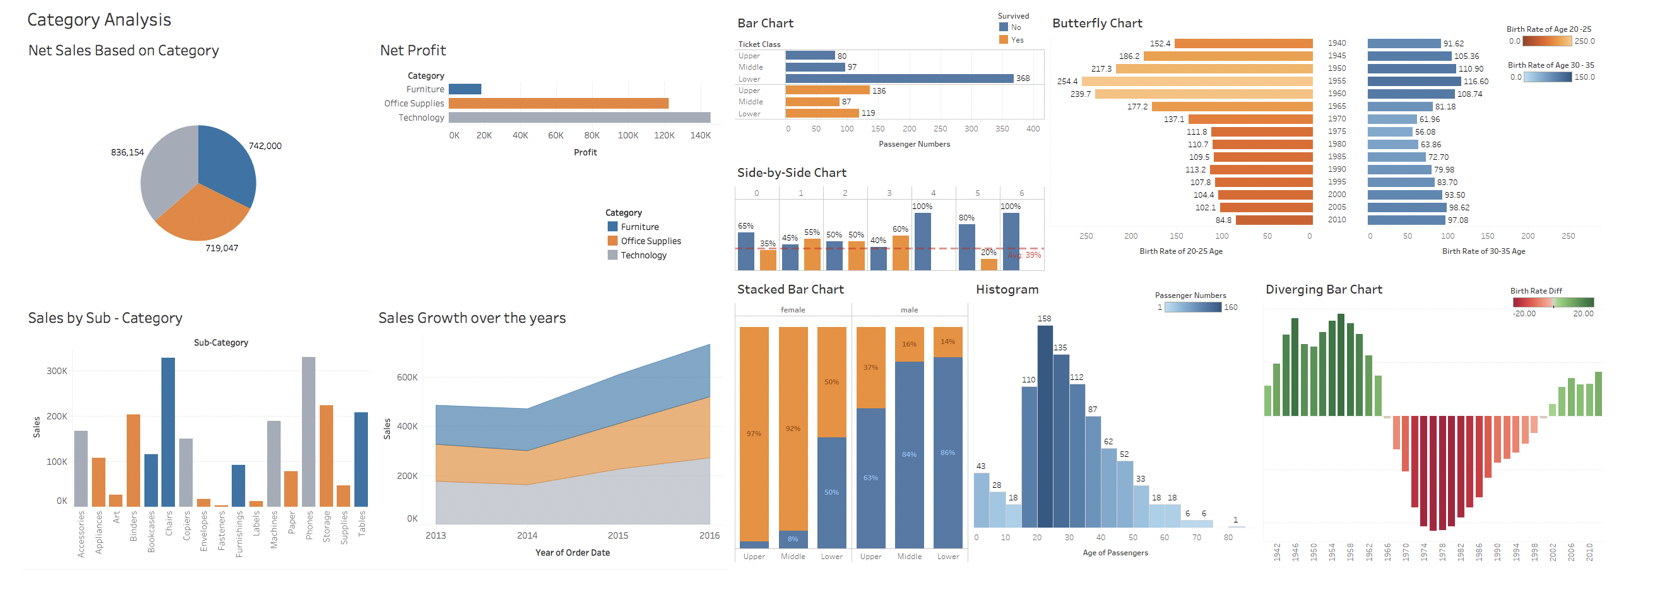

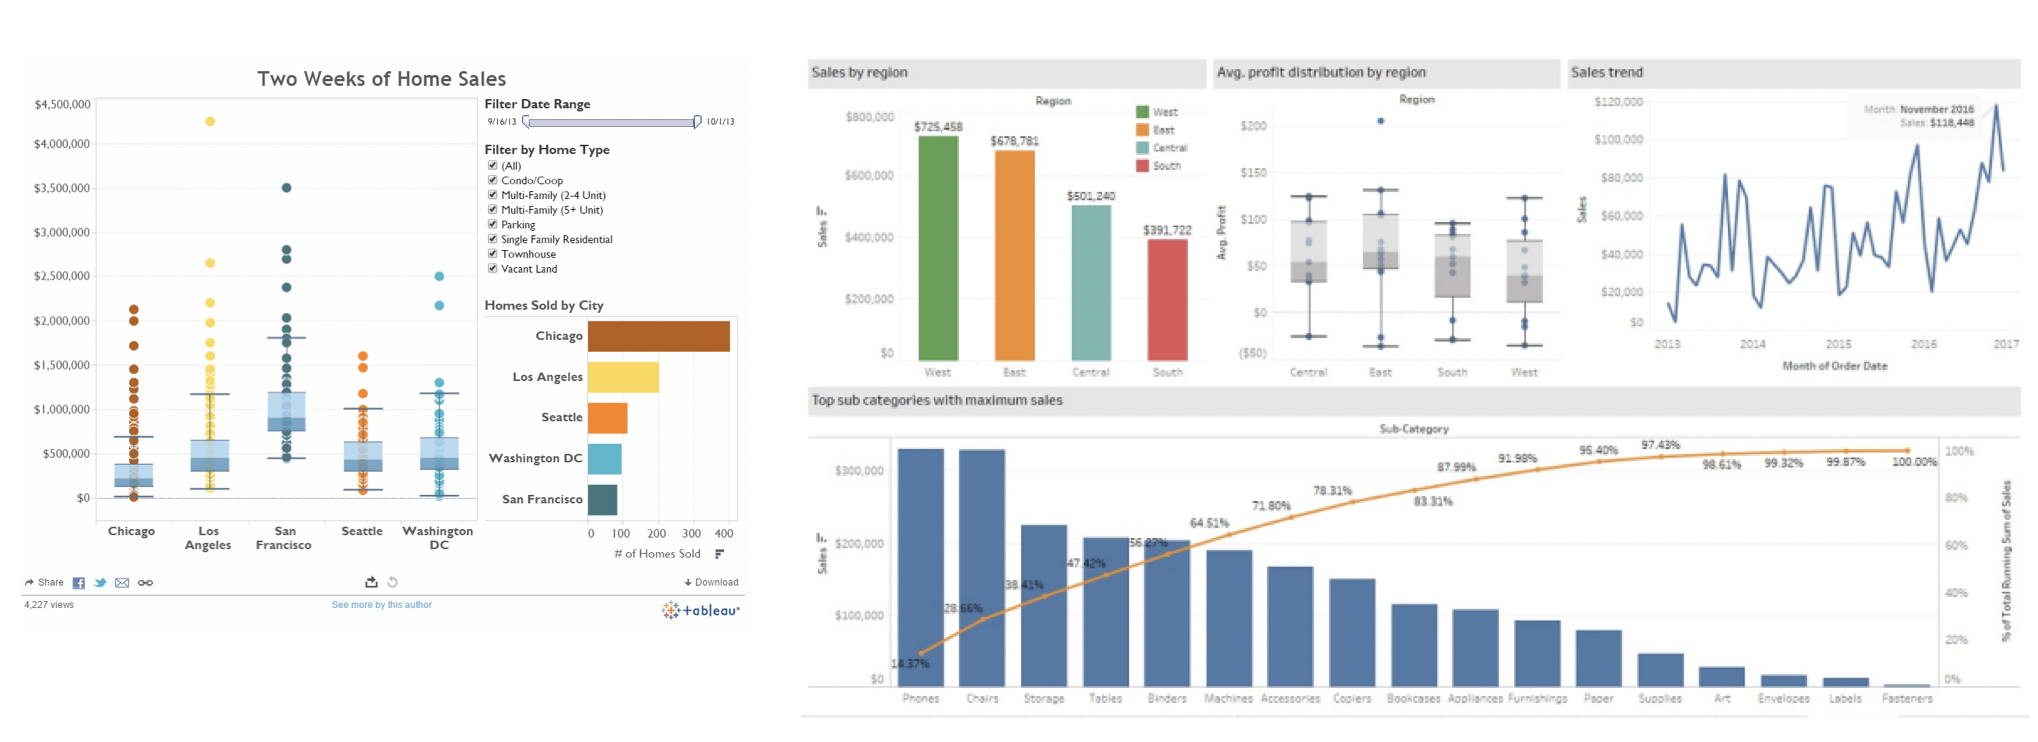